In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
import os
os.getcwd()
os.chdir('/Users/danishnaseem/Downloads/Traffic_Sign')

In [3]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
X_validation.shape

(4410, 32, 32, 3)

In [8]:
y_validation.shape

(4410,)

In [9]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
y_test.shape

(12630,)

36

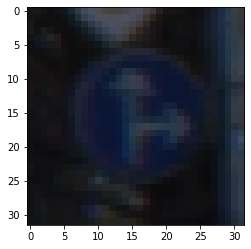

In [11]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

36

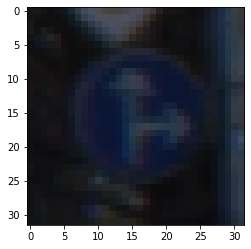

In [12]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

37

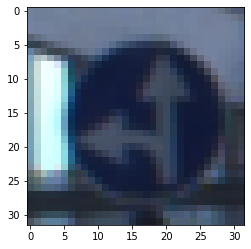

In [13]:
i = 5000
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

1

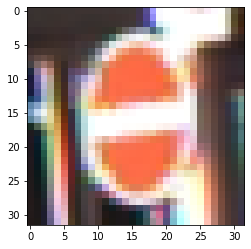

In [14]:
i = 4000
plt.imshow(X_validation[i]) # Show images are not shuffled
y_train[i]

1

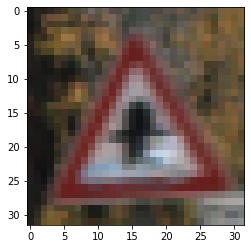

In [15]:
i = 3000
plt.imshow(X_test[i]) # Show images are not shuffled
y_train[i]

In [16]:
#Shuffling data so we dont have any order so network doesn't learn order
#and overfit according to the order
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [17]:
#convert image from colour to gray scale
#dividing by 3 normalizes
#keepdims = True
#average three pixels(rgb and put it into one image)
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)


In [18]:
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
  

In [19]:
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [20]:
X_train_gray.shape

(34799, 32, 32, 1)

In [21]:
X_test_gray.shape

(12630, 32, 32, 1)

In [22]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [23]:
#normalizing
X_train_gray_norm = (X_train_gray - 128)/128 


In [24]:
X_test_gray_norm = (X_test_gray - 128)/128


In [25]:
X_validation_gray_norm = (X_validation_gray - 128)/128

In [26]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

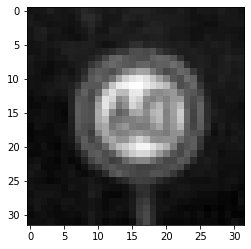

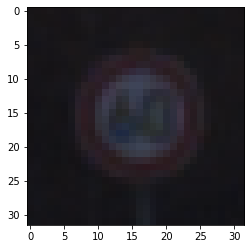

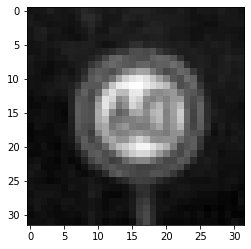

In [27]:
i = 610
#squeeze as final dimension 1 of 32x32x1 not needed anymore
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap = 'gray')
#Have original grayscale,colour and normalized image

# Model Training

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [28]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [29]:
#Building network in Sequential fashion
cnn_model = Sequential()

#add first convolution
#depth 6,
#Used a 5x5 Filter with input depth of 3 and output depth of 6
# Apply a RELU Activation function to the output
#Input = 32x32x1
#Subsampling reducing feature size 

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))



In [30]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [31]:
#Batch size is number of images fed into system at once
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

/Users/danishnaseem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 9s 245us/step - loss: 3.1403 - accuracy: 0.1804 - val_loss: 2.6066 - val_accuracy: 0.2893
Epoch 2/50
34799/34799 [==============================] - 8s 228us/step - loss: 1.6175 - accuracy: 0.5464 - val_loss: 1.4286 - val_accuracy: 0.6009
Epoch 3/50
34799/34799 [==============================] - 8s 228us/step - loss: 0.9640 - accuracy: 0.7169 - val_loss: 1.0326 - val_accuracy: 0.6991
Epoch 4/50
34799/34799 [==============================] - 8s 227us/step - loss: 0.6880 - accuracy: 0.8057 - val_loss: 0.9220 - val_accuracy: 0.7270
Epoch 5/50
34799/34799 [==============================] - 8s 227us/step - loss: 0.5401 - accuracy: 0.8501 - val_loss: 0.7866 - val_accuracy: 0.7689
Epoch 6/50
34799/34799 [==============================] - 8s 234us/step - loss: 0.4452 - accuracy: 0.8808 - val_loss: 0.7247 - val_accuracy: 0.7857
Epoch 7/50
34799/34799 [==============================] - 8s 23

In [32]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8444


In [33]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [37]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']



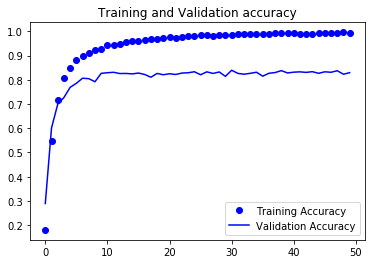

In [38]:
#Training Accuracy increases with epochs
#Validation results lower than training value
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

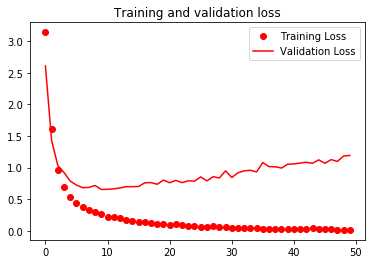

In [39]:
#Training set loss decreases with increase in epochs
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [43]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

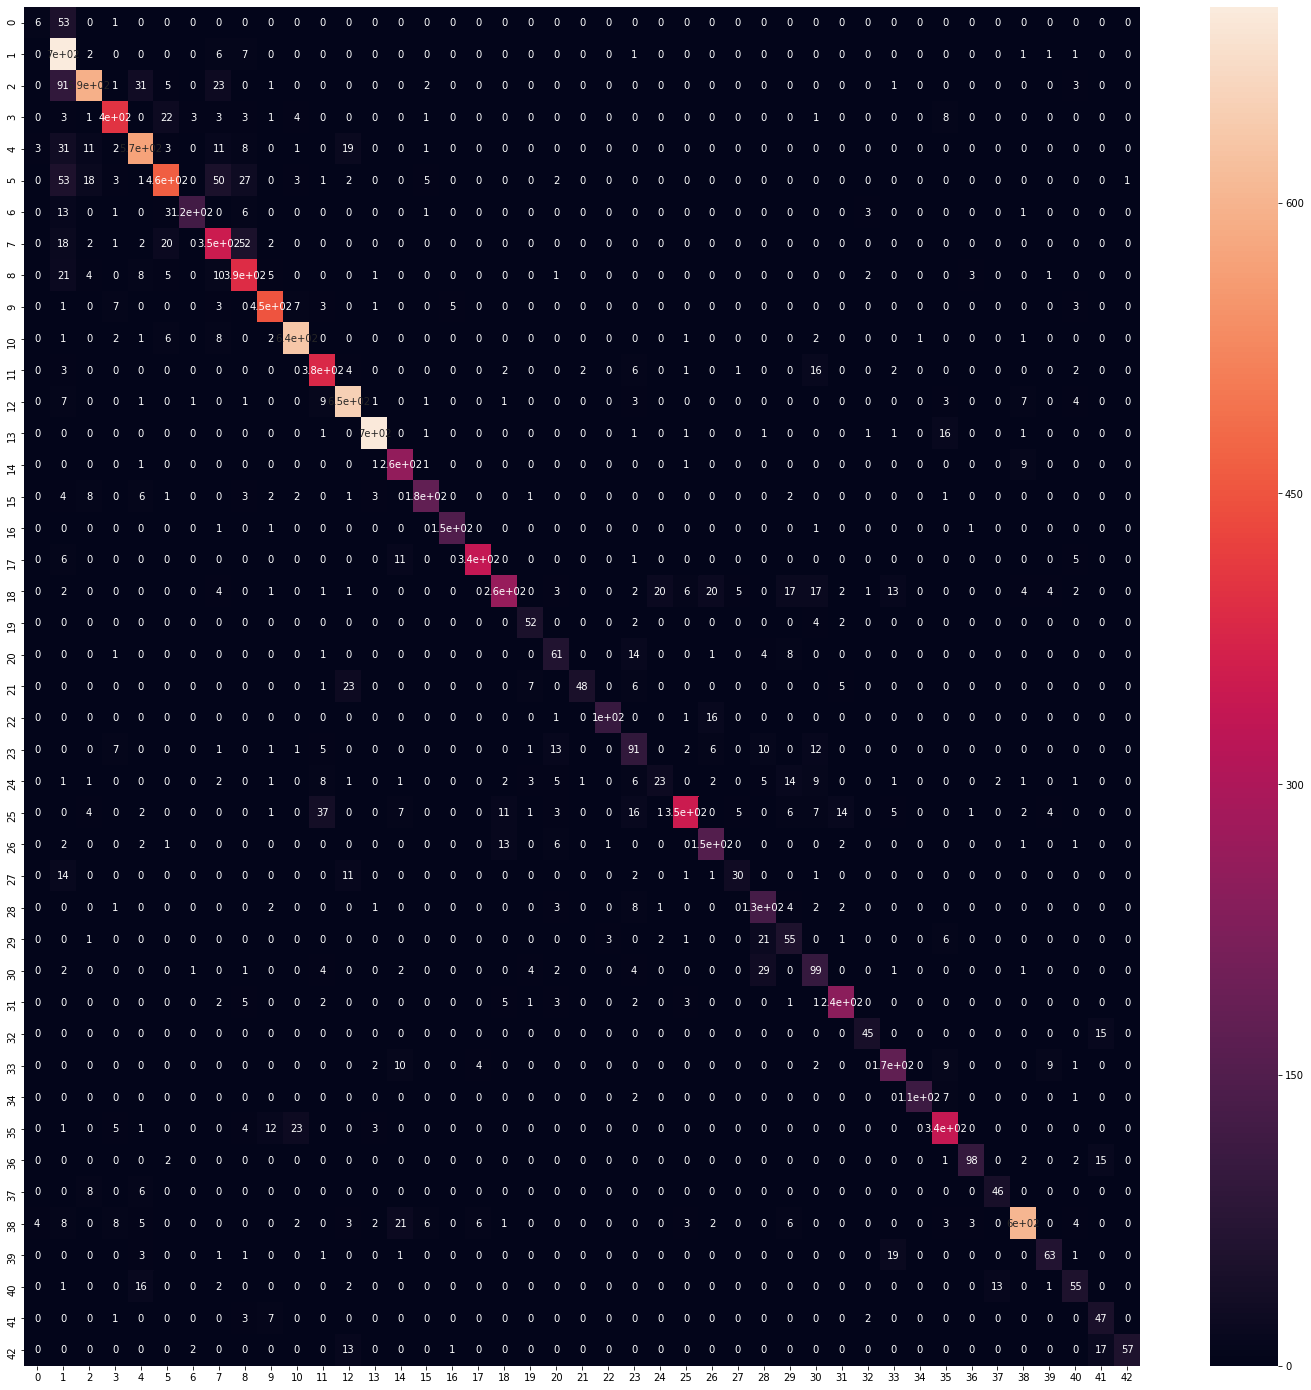

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

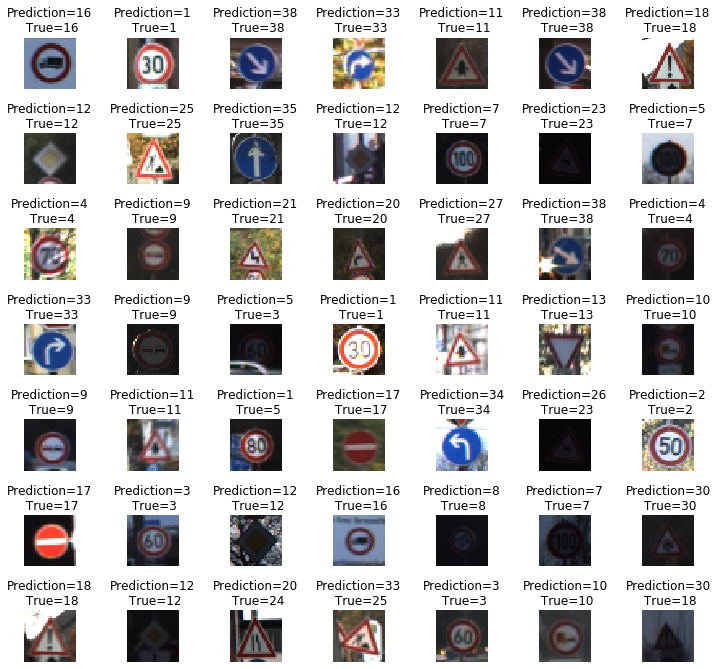

In [45]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #Flatten array

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)